In [1]:
import torch
import torchvision

import torch.nn as nn
import math

import numpy as np

from SRNet import ASPPNet, NSDataset, ToTensor, \
train_net, display_state, SRNet, \
HFNet, HFDataset, train_net_vecloss,convert_vector

from SRNetEval import *

In [2]:
GPU = True

# Model

In [3]:
#net = ASPPNet(num_aspp_blocks=4, inplanes=3)
net = HFNet(num_res_blocks=7,inplanes=4,outplanes=3)
# path = './weights/SR4_BC/2018-09-21_16-03-03_res7/epoch_100.weights'
# path = './weights/2018-10-04_20-03-16/epoch_25.weights'
# checkpoint = torch.load(path)
# net.load_state_dict(checkpoint)

if GPU:
    net = net.cuda()


# Dataloader

In [4]:
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
%matplotlib inline

import h5py

D:\Anaconda3\envs\pytorch\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [5]:
basepath = '../viscosityPython/srdata/'
trainpath = 'Porosity16_Train.h5'
sr_data = h5py.File(trainpath,'r')

In [10]:
training_data = sr_data['training_data']
print(training_data.shape)

(400, 4, 64, 64)


In [9]:
qtestdata = h5py.File('Porosity16_Test.h5','r')
# orig_data = h5py.File('Porosity16_data.h5','r')#['training_data']
# highres_data = orig_data['training_labels']
# lowres_data = orig_data['training_data']

### Input Data

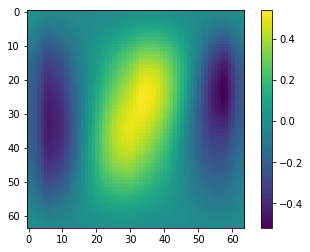

In [11]:
plt.imshow(sr_data['training_data'][0,0])
plt.colorbar()

### Initial Net results

In [11]:
#traindata = NSDataset(sr_data,ToTensor())

In [12]:
transform = ToTensor()#transforms.Compose([ToTensor(),Normalize(means=np.zeros(4),stds=[1,1,1e-3,1e-3])])
traindata = NSDataset(sr_data,transform)

In [13]:
trainloader = DataLoader(traindata,batch_size=5,shuffle=True)

In [14]:

testdata = NSDataset(qtestdata,transform=transform)
testloader = DataLoader(testdata,batch_size=1,shuffle=False)

# Train

In [16]:
#tv_regs = np.array([.1,.01,.001])
#final_mses = np.zeros_like(tv_regs)

D:\Anaconda3\envs\pytorch\lib\site-packages\torch\nn\functional.py:1749: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


Channel	Net Error	Bilinear	Vec Net	Vec Bil
U	0.914	0.491	0.792	0.381
V	1.080	0.511	1.108	0.929
P	1.051	0.670	1.051	0.670


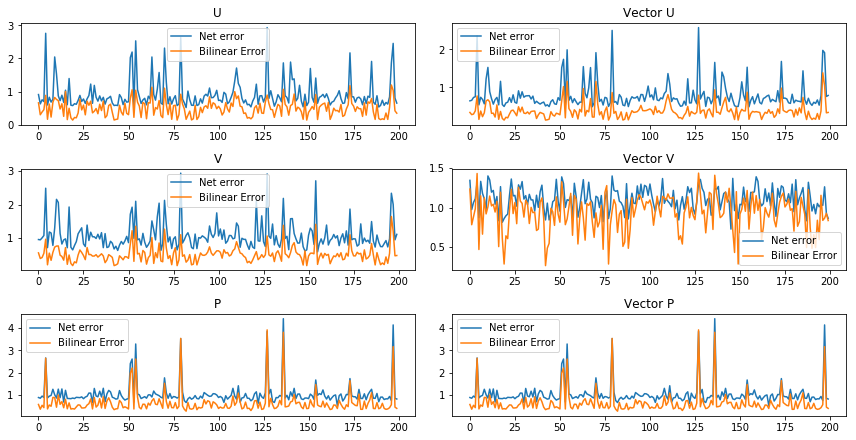

0.6597973609626063


In [12]:
# nmses, nbil_mses = compute_error(net,testdata,lowres_data[len(traindata):],
#                              highres_data=highres_data[len(traindata):],
#                              GPU=GPU,vec_metric=True)
# print(nbil_mses.mean())

In [15]:
#for i,tv_reg in enumerate(tv_regs):
train_net(net,trainloader,num_epochs=100,lr=1e-4,GPU=GPU,save_epoch=5,
                      weightpath='./weights/',saveweights=True)
#    nmses, nbil_mses = compute_error(net,testdata,lowres_data[len(traindata):],
#                             highres_data=highres_data[len(traindata):],
#                             GPU=GPU,vec_metric=False)
#    final_mses[i] = nmses.mean()

	[1,     8] loss: 0.03844, 7.78 seconds elapsed
	[1,    16] loss: 0.01025, 13.88 seconds elapsed
	[1,    24] loss: 0.00718, 19.62 seconds elapsed
	[1,    32] loss: 0.00546, 25.35 seconds elapsed
	[1,    40] loss: 0.00401, 31.16 seconds elapsed
	[1,    48] loss: 0.00364, 36.81 seconds elapsed
	[1,    56] loss: 0.00343, 42.44 seconds elapsed
	[1,    64] loss: 0.00273, 48.17 seconds elapsed
	[1,    72] loss: 0.00247, 53.86 seconds elapsed
	[1,    80] loss: 0.00224, 59.58 seconds elapsed
Epoch 1 Training Time: 59.58 seconds
Total Elapsed Time: 59.58 seconds
	[2,     8] loss: 0.00221, 5.72 seconds elapsed
	[2,    16] loss: 0.00206, 11.38 seconds elapsed
	[2,    24] loss: 0.00194, 17.07 seconds elapsed
	[2,    32] loss: 0.00187, 22.74 seconds elapsed
	[2,    40] loss: 0.00179, 28.42 seconds elapsed
	[2,    48] loss: 0.00167, 34.12 seconds elapsed
	[2,    56] loss: 0.00149, 39.83 seconds elapsed
	[2,    64] loss: 0.00137, 45.55 seconds elapsed
	[2,    72] loss: 0.00130, 51.41 seconds elapsed


	[15,    56] loss: 0.00038, 39.78 seconds elapsed
	[15,    64] loss: 0.00032, 45.37 seconds elapsed
	[15,    72] loss: 0.00035, 50.98 seconds elapsed
	[15,    80] loss: 0.00040, 56.58 seconds elapsed
Epoch 15 Training Time: 56.58 seconds
Total Elapsed Time: 859.09 seconds
	[16,     8] loss: 0.00040, 5.59 seconds elapsed
	[16,    16] loss: 0.00033, 11.20 seconds elapsed
	[16,    24] loss: 0.00037, 16.81 seconds elapsed
	[16,    32] loss: 0.00036, 22.42 seconds elapsed
	[16,    40] loss: 0.00033, 28.04 seconds elapsed
	[16,    48] loss: 0.00036, 33.66 seconds elapsed
	[16,    56] loss: 0.00033, 39.29 seconds elapsed
	[16,    64] loss: 0.00036, 44.92 seconds elapsed
	[16,    72] loss: 0.00041, 50.52 seconds elapsed
	[16,    80] loss: 0.00035, 56.13 seconds elapsed
Epoch 16 Training Time: 56.13 seconds
Total Elapsed Time: 915.22 seconds
	[17,     8] loss: 0.00038, 5.64 seconds elapsed
	[17,    16] loss: 0.00033, 11.25 seconds elapsed
	[17,    24] loss: 0.00033, 16.88 seconds elapsed
	[17, 

	[30,     8] loss: 0.00035, 5.64 seconds elapsed
	[30,    16] loss: 0.00026, 11.25 seconds elapsed
	[30,    24] loss: 0.00021, 16.87 seconds elapsed
	[30,    32] loss: 0.00023, 22.49 seconds elapsed
	[30,    40] loss: 0.00027, 28.09 seconds elapsed
	[30,    48] loss: 0.00024, 33.69 seconds elapsed
	[30,    56] loss: 0.00027, 39.33 seconds elapsed
	[30,    64] loss: 0.00025, 44.94 seconds elapsed
	[30,    72] loss: 0.00025, 50.58 seconds elapsed
	[30,    80] loss: 0.00023, 56.18 seconds elapsed
Epoch 30 Training Time: 56.18 seconds
Total Elapsed Time: 1703.49 seconds
	[31,     8] loss: 0.00022, 5.67 seconds elapsed
	[31,    16] loss: 0.00026, 11.28 seconds elapsed
	[31,    24] loss: 0.00025, 16.89 seconds elapsed
	[31,    32] loss: 0.00021, 22.51 seconds elapsed
	[31,    40] loss: 0.00023, 28.15 seconds elapsed
	[31,    48] loss: 0.00025, 33.77 seconds elapsed
	[31,    56] loss: 0.00025, 39.39 seconds elapsed
	[31,    64] loss: 0.00024, 44.97 seconds elapsed
	[31,    72] loss: 0.00024, 

	[44,    40] loss: 0.00017, 28.38 seconds elapsed
	[44,    48] loss: 0.00017, 34.01 seconds elapsed
	[44,    56] loss: 0.00020, 39.64 seconds elapsed
	[44,    64] loss: 0.00017, 45.31 seconds elapsed
	[44,    72] loss: 0.00020, 50.98 seconds elapsed
	[44,    80] loss: 0.00016, 56.61 seconds elapsed
Epoch 44 Training Time: 56.61 seconds
Total Elapsed Time: 2493.84 seconds
	[45,     8] loss: 0.00017, 5.66 seconds elapsed
	[45,    16] loss: 0.00017, 11.32 seconds elapsed
	[45,    24] loss: 0.00017, 16.98 seconds elapsed
	[45,    32] loss: 0.00018, 22.67 seconds elapsed
	[45,    40] loss: 0.00019, 28.36 seconds elapsed
	[45,    48] loss: 0.00021, 34.00 seconds elapsed
	[45,    56] loss: 0.00019, 39.79 seconds elapsed
	[45,    64] loss: 0.00018, 45.42 seconds elapsed
	[45,    72] loss: 0.00018, 51.08 seconds elapsed
	[45,    80] loss: 0.00020, 56.73 seconds elapsed
Epoch 45 Training Time: 56.73 seconds
Total Elapsed Time: 2550.57 seconds
	[46,     8] loss: 0.00015, 5.66 seconds elapsed
	[46

	[58,    72] loss: 0.00013, 50.98 seconds elapsed
	[58,    80] loss: 0.00015, 56.64 seconds elapsed
Epoch 58 Training Time: 56.64 seconds
Total Elapsed Time: 3286.57 seconds
	[59,     8] loss: 0.00013, 5.77 seconds elapsed
	[59,    16] loss: 0.00016, 11.52 seconds elapsed
	[59,    24] loss: 0.00014, 17.16 seconds elapsed
	[59,    32] loss: 0.00015, 22.76 seconds elapsed
	[59,    40] loss: 0.00017, 28.41 seconds elapsed
	[59,    48] loss: 0.00016, 34.04 seconds elapsed
	[59,    56] loss: 0.00013, 39.73 seconds elapsed
	[59,    64] loss: 0.00016, 45.60 seconds elapsed
	[59,    72] loss: 0.00017, 51.42 seconds elapsed
	[59,    80] loss: 0.00012, 57.06 seconds elapsed
Epoch 59 Training Time: 57.06 seconds
Total Elapsed Time: 3343.63 seconds
	[60,     8] loss: 0.00013, 5.69 seconds elapsed
	[60,    16] loss: 0.00015, 11.42 seconds elapsed
	[60,    24] loss: 0.00015, 17.07 seconds elapsed
	[60,    32] loss: 0.00016, 22.71 seconds elapsed
	[60,    40] loss: 0.00015, 28.34 seconds elapsed
	[60

	[73,     8] loss: 0.00013, 5.70 seconds elapsed
	[73,    16] loss: 0.00012, 11.37 seconds elapsed
	[73,    24] loss: 0.00012, 17.06 seconds elapsed
	[73,    32] loss: 0.00014, 22.72 seconds elapsed
	[73,    40] loss: 0.00012, 28.44 seconds elapsed
	[73,    48] loss: 0.00011, 34.08 seconds elapsed
	[73,    56] loss: 0.00014, 39.71 seconds elapsed
	[73,    64] loss: 0.00013, 45.35 seconds elapsed
	[73,    72] loss: 0.00012, 51.03 seconds elapsed
	[73,    80] loss: 0.00011, 56.72 seconds elapsed
Epoch 73 Training Time: 56.72 seconds
Total Elapsed Time: 4137.14 seconds
	[74,     8] loss: 0.00012, 5.66 seconds elapsed
	[74,    16] loss: 0.00012, 11.33 seconds elapsed
	[74,    24] loss: 0.00013, 16.98 seconds elapsed
	[74,    32] loss: 0.00014, 22.61 seconds elapsed
	[74,    40] loss: 0.00013, 28.30 seconds elapsed
	[74,    48] loss: 0.00011, 34.04 seconds elapsed
	[74,    56] loss: 0.00011, 39.82 seconds elapsed
	[74,    64] loss: 0.00012, 45.54 seconds elapsed
	[74,    72] loss: 0.00014, 

	[87,    40] loss: 0.00011, 28.35 seconds elapsed
	[87,    48] loss: 0.00011, 34.07 seconds elapsed
	[87,    56] loss: 0.00011, 39.71 seconds elapsed
	[87,    64] loss: 0.00012, 45.40 seconds elapsed
	[87,    72] loss: 0.00011, 51.05 seconds elapsed
	[87,    80] loss: 0.00009, 56.71 seconds elapsed
Epoch 87 Training Time: 56.71 seconds
Total Elapsed Time: 4931.31 seconds
	[88,     8] loss: 0.00011, 5.71 seconds elapsed
	[88,    16] loss: 0.00011, 11.35 seconds elapsed
	[88,    24] loss: 0.00011, 17.01 seconds elapsed
	[88,    32] loss: 0.00012, 22.69 seconds elapsed
	[88,    40] loss: 0.00011, 28.37 seconds elapsed
	[88,    48] loss: 0.00009, 34.03 seconds elapsed
	[88,    56] loss: 0.00010, 39.70 seconds elapsed
	[88,    64] loss: 0.00010, 45.34 seconds elapsed
	[88,    72] loss: 0.00009, 51.01 seconds elapsed
	[88,    80] loss: 0.00010, 56.64 seconds elapsed
Epoch 88 Training Time: 56.64 seconds
Total Elapsed Time: 4987.95 seconds
	[89,     8] loss: 0.00010, 5.62 seconds elapsed
	[89

In [32]:
print(final_mses)

[0.66182419 0.67493422 0.64800631]


# Evaluate

In [ ]:
# net = PSNet(num_res_blocks=5)
# checkpoint = torch.load('./weights/2018-09-20_10-46-17_unnormalized_PSLayer/epoch_50.weights')
# net.load_state_dict(checkpoint)
# if GPU:
#     net = net.cuda()

In [20]:
test_data = torch.Tensor(sr_data['training_data'][()])
test_labels = torch.Tensor(sr_data['training_labels'][()])
test_labels = test_labels+test_data[:,:-1,...]

In [21]:
baseline = torch.pow(convert_vector(test_labels)-convert_vector(test_data[:,:-1,...]),2).mean()

In [22]:
baseline.numpy()

array(0.17066975, dtype=float32)

D:\Anaconda3\envs\pytorch\lib\site-packages\torch\nn\functional.py:1749: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


Channel	Net Error	Bilinear	Vec Net	Vec Bil
U	0.207	0.491	0.175	0.381
V	0.236	0.511	0.685	0.929
P	0.246	0.670	0.246	0.670


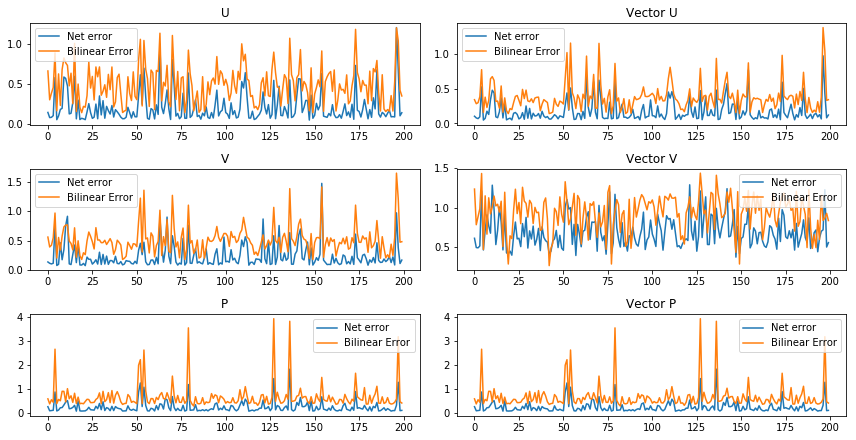

In [30]:
nmses, nbil_mses = compute_error(net,testdata,lowres_data[len(traindata):],
                                 highres_data=highres_data[len(traindata):],
                                 GPU=GPU,vec_metric=True)

idx 354
Bilinear Error: 0.0824, 0.3403 
Net Error: 0.0650, 0.3022 


D:\Anaconda3\envs\pytorch\lib\site-packages\torch\nn\functional.py:1749: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


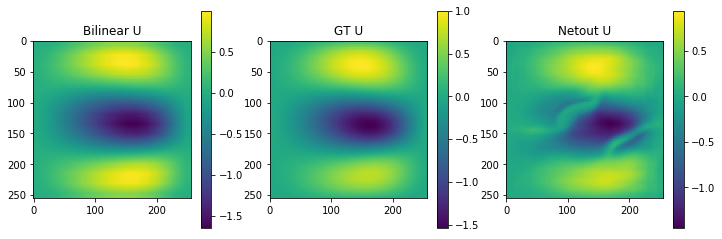

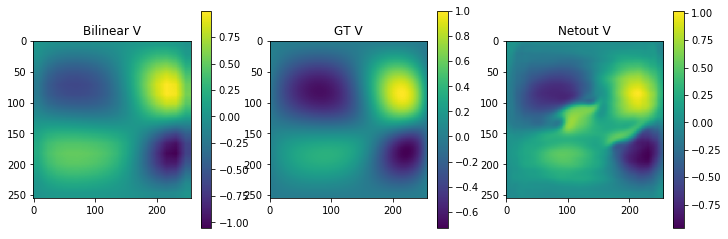

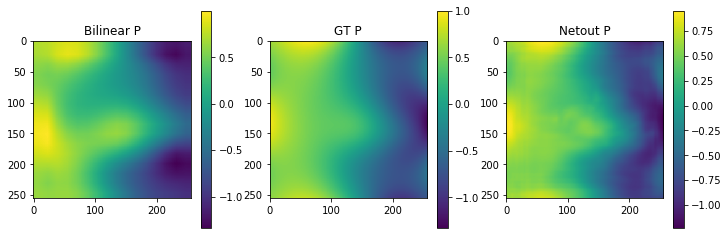

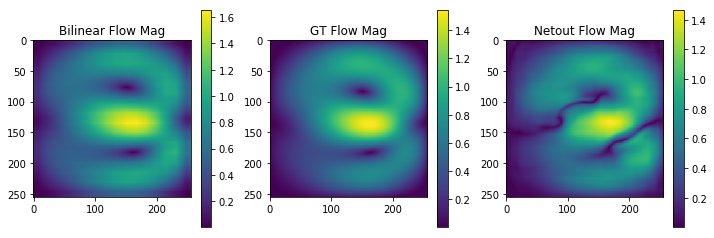

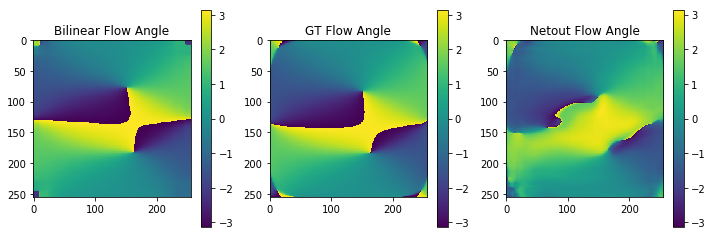

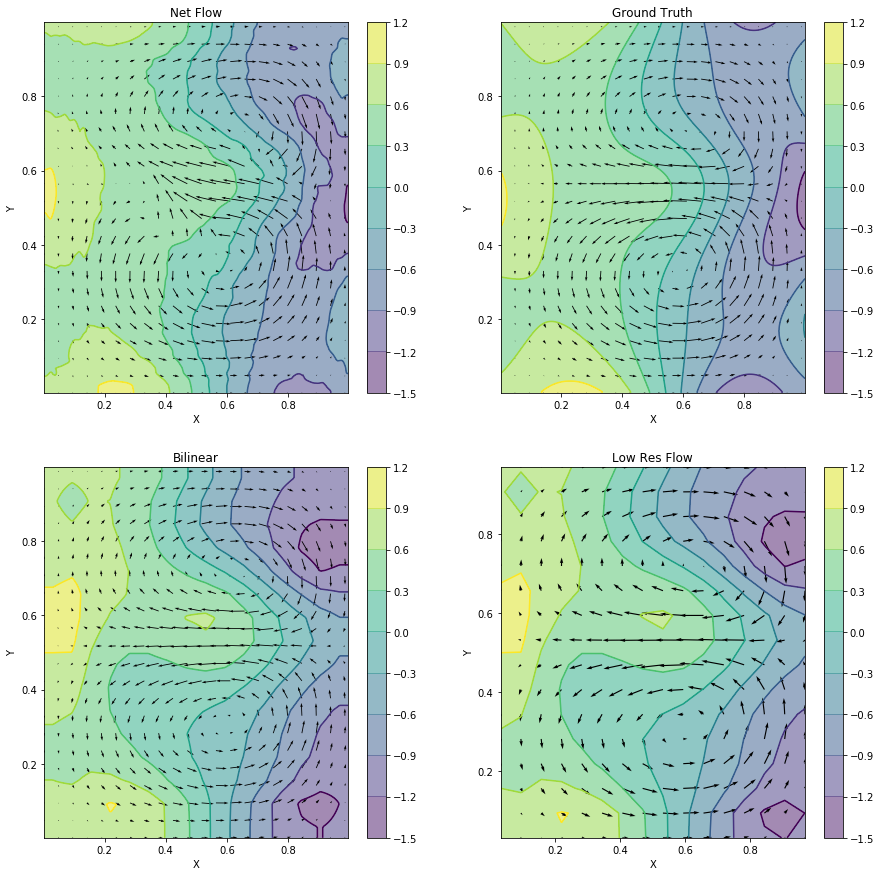

In [26]:
display_results(net,traindata,lowres_data[:len(traindata)],
                highres_data=highres_data[:len(traindata)],
                GPU=GPU)

In [ ]:
n = len(testloader)
mses = np.zeros((n,3))
bil_mses = np.zeros((n,3))

for i, sample in enumerate(testloader):
    data,label = sample
    #label += data
    #display_state(nn.functional.upsample(data,scale_factor=2,mode='bilinear')[0,...])

    if GPU:
        output = net(data.cuda()).cpu().detach().numpy()
    else:
        output = net(data).detach().numpy()
    #bil = data.detach().numpy()
    #output += bil
    label = label.detach().numpy()
    
    mses[i] = np.mean(np.power(output-label,2),axis=(0,-1,-2))

    # Compare against bil
    bil_mses[i] = np.mean(np.power(label,2),axis=(0,-1,-2))

print('Channel\tNet Error\tBilinear')
for i,c in enumerate(['U','V','P']):
    print(c + '\t%.3fe-06\t%.3fe-06' % (mses[:,i].mean()*1e6, bil_mses[:,i].mean()*1e6))



In [ ]:
fig = plt.figure(figsize=(12,8))
fig.tight_layout()
channels = ['U','V','P']
for i in range(3):
    plt.subplot(3,1,i+1)
    plt.plot(mses[:,i],label='Net error')
    plt.plot(bil_mses[:,i],label='Bilinear Error')
    plt.title(channels[i])
    plt.legend(loc=0)

plt.show()



In [ ]:
fig = plt.figure(figsize=(12,8))
fig.tight_layout()
channels = ['U','V','Px','Py']
for i in range(4):
    plt.subplot(4,1,i+1)
    plt.plot(mses[:,i],'b')
    plt.plot(naive_mses[:,i],'r')
    plt.title(channels[i])
plt.show()

# Average MSE per Epoch

In [ ]:
import os
import glob

In [ ]:
def epoch_num(path):
    return path[path.rfind('_')+1:path.rfind('.')]

In [ ]:
weights = glob.glob('./weights/2018-09-19_18-11-33_unnormalized_bil_50/*.weights')
epochs = [int(epoch_num(path)) for path in weights]
weights = np.array(weights)[np.argsort(epochs)]
print(weights)
epochs.sort()

In [ ]:
sr_data = h5py.File('SR_Datav2.h5','r')
qtestdata = h5py.File('SR_Test_Quad_Datav2.h5','r')


In [ ]:
#qtestinputs = qtestdata['training_data']
#qtestlabels = qtestdata['training_labels']

transform = ToTensor()
testdata = NSDataset(qtestdata,transform)
testloader = DataLoader(testdata,batch_size=5,shuffle=False)
print(len(testdata),len(testloader))


traindata = NSDataset(sr_data,transform)
trainloader = DataLoader(traindata,batch_size=5,shuffle=False)
print(len(traindata),len(trainloader))


In [ ]:
epoch_mses = np.zeros((len(epochs),4))
train_mses = np.zeros((len(epochs),4))

In [ ]:

for idx in range(len(epochs)):
    print('Evaluating Epoch %i' % (epochs[idx]))
    net = SRNet(num_res_blocks=5)
    checkpoint = torch.load(weights[idx])

    net.load_state_dict(checkpoint)
    if GPU:
        net = net.cuda()

#     n = len(testloader)
#     mses = np.zeros((n,4))

#     for i, sample in enumerate(testloader):
#         data, label = sample
#         label = label.numpy()
#         # evaluate
#         if GPU:
#             output = net(data.cuda()).cpu().detach().numpy()
#         else:
#             output = net(data).detach().numpy()

#         mses[i] = np.mean(np.power(output-label,2),axis=(0,-1,-2))
#     epoch_mses[idx] = mses.mean(axis=0)
    
    n = len(trainloader)
    mses = np.zeros((n,4))

    for i, sample in enumerate(trainloader):
        data, label = sample
        label = label.numpy()
        # evaluate
        if GPU:
            output = net(data.cuda()).cpu().detach().numpy()
        else:
            output = net(data).detach().numpy()

        mses[i] = np.mean(np.power(output-label,2),axis=(0,-1,-2))
    train_mses[idx] = mses.mean(axis=0)

In [ ]:
for i,c in enumerate(['U','V','Px','Py']):
    plt.figure()
    plt.title(c + ' Mses')
    plt.plot(epochs, train_mses[:,i])

In [ ]:
for i,c in enumerate(['U','V','Px','Py']):
    plt.figure()
    plt.title(c + ' Mses')
    plt.plot(epochs, epoch_mses[:,i])

In [ ]:
fig = plt.figure(figsize=(12,8))
#for i in range(n):
i = 3
data = torch.Tensor(qtestinputs[i])
labels = qtestlabels[i]
if GPU:
    output = net(data.cuda().unsqueeze(0))[0,...].cpu().detach().numpy()
else:
    output = net(data.unsqueeze(0))[0,...].detach().numpy()

plt.subplot(231)
plt.imshow(output[0])
plt.colorbar()
plt.title('U Predicted')

plt.subplot(232)
plt.imshow(labels[0])
plt.colorbar()
plt.title('U GT')

plt.subplot(233)
plt.imshow(np.kron(qtestinputs[i,0],np.ones((2,2))))
plt.colorbar()
plt.title('U Naive')


plt.subplot(234)
plt.imshow(output[1])
plt.colorbar()
plt.title('V Predicted')

plt.subplot(235)
plt.imshow(labels[1])
plt.colorbar()
plt.title('V GT')

plt.subplot(236)
plt.imshow(np.kron(qtestinputs[i,1],np.ones((2,2))))
plt.colorbar()
plt.title('V Naive')

plt.show()
